In [14]:
#  In this mini-tutorial systems of ODEs are solved using the 
#  ModelingToolkit.jl and OrdinaryDiffEq.jl packages in Julia. 

#  The equations to be solved in the first example are as follows
#  (where u and v are functions of t):

#        du/dt = 1.5*u - 3.0*sin(2.0*v)
#        dv/dt = 2.0*u*v

#   The initial conditions are:  u(0) = 1.0 and v(0) = 1.0

#  The solution is to be obtained in the interval  0<t<1.0

#  The packages ModelingToolkit.jl, OrdinaryDiffEq.jl, and Plots.jl
#  need to be installed for this tutorial.

#  Date:  9/6/2021

#  Author:  Doug Frey, UMBC

In [1]:
#  The following package versions were used 
#  for this tutorial:

#
#      Status `C:\Users\Douglas Frey\environment_v161_var1\Project.toml`
#   [a75be94c] GalacticOptim v2.0.3
#   [961ee093] ModelingToolkit v6.4.9
#   [429524aa] Optim v1.4.1
#   [1dea7af3] OrdinaryDiffEq v5.55.1
#   [91a5bcdd] Plots v1.21.3

#  Package versions can be checked by running the commands:

       import Pkg
       Pkg.status()

      Status `C:\Users\solid\.julia\environments\v1.6\Project.toml`
  [a134a8b2] BlackBoxOptim v0.6.0
  [7073ff75] IJulia v1.23.2
  [d1acc4aa] IntervalArithmetic v0.19.1
  [d2bf35a9] IntervalRootFinding v0.5.9
  [438e738f] PyCall v1.92.3
  [f2b01f46] Roots v1.3.1


In [5]:
#  Make available for use the needed packages:

using ModelingToolkit, OrdinaryDiffEq, Plots

 
The value of u at t = 0.5 is: 1.9094130261787141
 
The value of v at t = 0.5 is: 3.1211630398370662


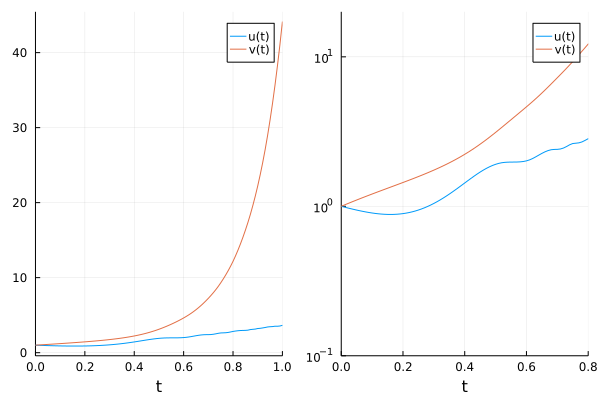

In [6]:
#  Specify the independent and dependent variables
#  and the constant parameters.  u and v are dependent
#  variables and t is an independent variable:

@variables t, u(t), v(t)
@parameters p1, p2, p3

#  Define the differential operator that will be used.
#  Note that the derivatives are with respect to t:

Dt = Differential(t)

#  Specify the differential equations to solve. Note
#  that ~ indicates an equal sign in the equations vector.
#  Note also that vectors are enclosed in square brackets.

eqs = [Dt(u) ~ p1*u - p3*sin(p2*v), Dt(v) ~ p2*u*v]

#  Specify the initial conditions for the dependent variables
#  and note that "=>" indicates "equal to":

init_cond = [u => 1.0, v => 1.0]

#  Specify the values  of the  parameters:

params  = [p1 => 1.5, p2 => 2.0, p3 => 3.0]

#  Specify the range of values for the independent variable
#  and note the parentheses used indicating t_span is a touple
#  and not a vector:

t_span = (0.0,1.0)

#  Create an ODESystem object and name it "sys":

@named  sys = ODESystem(eqs)

#  Create an ODEProblem object

prob = ODEProblem(sys, init_cond, t_span, params)

#  Solve the ODEProblem using the 5th order Tsitouras method
#  and save the solution at every 0.01 step in t.

result = OrdinaryDiffEq.solve(prob, Tsit5(), saveat = 0.01)

#  Print the values of u and v at t = 0.5 to the output.

println(" ")
println("The value of u at t = 0.5 is: ", result(0.5)[1])
println(" ")
println("The value of v at t = 0.5 is: ", result(0.5)[2])

#  Plot u and v using default settings.

plot1 = plot(result, vars=[u,v])

#  Make a custom plot where the y axis varies between 
#  0.1 and 20.0, the x axis varies between 0 and 0.8, and
#  the y axis is logarithmic:

plot2 = plot(result, vars=[u,v], xlims=(0,0.8), ylims=(0.1,20), yaxis=:log)

#  Now send both of the above plots to the output:

plot(plot1,plot2)



In [7]:
#  The second example involves two second order ODEs
#  and will illustrate the usefulness of ModelingToolkit's
#  symbolic abilities.

#  The equations to solve are the following:

#       d^2u/dt^2 = 1.5*u - 3.0*sin(2.0*v)
#       d^2v/dt^2 = 2.0*u*v

#   The initial conditions are:

#               u(0) = 1.0 
#               v(0) = 1.0
#               du/dt = 0 when t = 0 
#               dv/dt = 0 when t = 0

#    In order to solve this problem numerically, the above
#    two second order ODEs need  to be tranformed into four
#    first order ODEs. This can be done by defining two new 
#    dependent variables e.g., w and r where du/dt = w and 
#    dv/dt = r. This can be done automatically in 
#    ModelingToolkit.jl by using its symbolic abilities while in
#    MATLAB or Python this would have to be done manually.

 
The value of u at t = 0.5 is: 0.8576709693163279
 
The value of v at t = 0.5 is: 1.2536261065930177


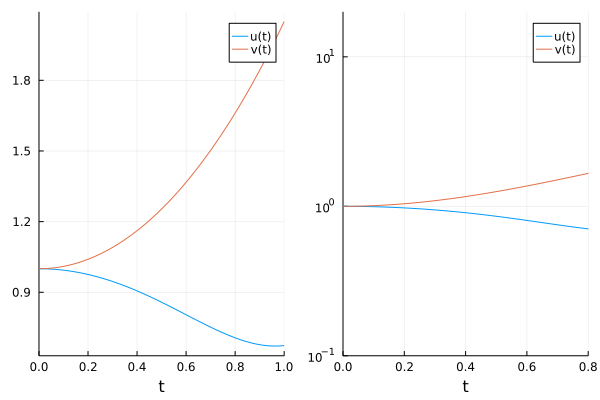

In [8]:
#  Specify the independent and dependent variables
#  and the constant parameters

@variables t, u(t), v(t)
@parameters p1, p2, p3

#  Define the differential operator that will be used

Dt = Differential(t)

#  Specify the differential equations to solve. Note
#  that ~ indicates an equal sign in the equations vector.
#  Note also that vectors are enclosed in square brackets.

eqs = [Dt(Dt(u)) ~ p1*u - p3*sin(p2*v), Dt(Dt(v)) ~ p2*u*v]

#  Specify the initial conditions for the dependent variables
#  and note that "=>" indicates "equal to":

init_cond = [Dt(u) => 0.0, Dt(v) => 0.0, u => 1.0, v => 1.0]

#  Specify the values  of the  parameters:

params  = [p1 => 1.5, p2 => 2.0, p3 => 3.0]

#  Specify the range of values for the independent variable
#  and note the parentheses used indicating t_span is a touple
#  and not a vector:

t_span = (0.0,1.0)

#  Create an ODESystem object and name it "sys":

@named  sys = ODESystem(eqs)

#  Automatically create four first order ODEs from the given
#  two second-order ODEs:

sys = ode_order_lowering(sys)

#  Create an ODEProblem object from the new sys:

prob = ODEProblem(sys, init_cond, t_span, params)

#  Solve the ODEProblem using the 5th order Tsitouras method
#  and save the solution at every 0.01 step in t.

result = OrdinaryDiffEq.solve(prob, Tsit5(), saveat = 0.01)

#  Print the values of u and v at t = 0.5 to the output.
#  Note that u and v are now the 3rd and 4th dependent
#  variables, while the new dependent variables 
#  are the first and second.

println(" ")
println("The value of u at t = 0.5 is: ", result(0.5)[3])
println(" ")
println("The value of v at t = 0.5 is: ", result(0.5)[4])

#  Plot u and v using default settings.

plot1 = plot(result, vars=[u,v])

#  Make a custom plot where the y axis varies between 
#  0.1 and 20.0, the x axis varies between 0 and 0.8, and
#  the y axis is logarithmic.

plot2 = plot(result, vars=[u,v], xlims=(0,0.8), ylims=(0.1,20), yaxis=:log )

#  Now send both of the above plots to the output 

plot(plot1,plot2)



In [9]:
#  Now check what happened in the second 
#  example given above. First, show symbolically
#  the original set of two second-order ODEs:

eqs

2-element Vector{Equation}:
 Differential(t)(Differential(t)(u(t))) ~ p1*u(t) - (p3*sin(p2*v(t)))
 Differential(t)(Differential(t)(v(t))) ~ p2*u(t)*v(t)

In [10]:
#  Now show symbolically the equivalent set
#  of four first order ODEs that was actually solved.
#  Note that u_t and v_t are new dependent
#  variables created by ModelingToolkit.

sys

Model sys with 4 equations
States (4):
  uˍt(t)
  vˍt(t)
  u(t)
  v(t)
Parameters (3):
  p3
  p1
  p2